# Day 5 - Part 1

## Chance and Sampling

## The "Monty Hall" Problem

<img src="./monty.svg" width=75% />

## Discussion question

- You originally selected door #1.
- The host reveals door #3 to have a goat behind it.
- You should:

    - A) keep with door number #1; it has just as high a chance of winning as door #2.
    - B) switch to door number #2; it has a higher chance of winning than door #1.

## Marilyn vos Savant's column


<div style="display: flex; margin-top: .5in">
<div style="width: 45%;">
    <ul>
        <li>vos Savant asked the question in <i>Parade</i> magazine.</li>
        <li>She stated the correct answer: <i>switch</i>.</li>
        <li>Received over 10,000 letters in disagreement.</li>
        <li>Over 1,000 letters from people with Ph.D.s</li>
    </ul>
</div>
<div style="width: 50%;">
    <img src="vos_savant.jpg" width=75%>
</div>
</div>


## In this lecture...

- Simulate the Monty Hall problem many times.
- Convince ourselves that switching is the best option.

In [1]:
#: the usual suspects
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Random Selection

## Making a random choice

- `np.random.choice(options)`
- `options` is a list or array of values to choose from
- Return a random element from `options`

In [2]:
# simulate a coin flip
np.random.choice(['Heads', 'Tails'])

'Heads'

## Making multiple random choices

- `np.random.choice(options, n)`

In [3]:
#: simulate 10 coin flips
np.random.choice(['Heads', 'Tails'], 10)

array(['Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Tails', 'Heads'], dtype='<U5')

## Summarizing the results

- `np.count_nonzero(sequence)`
- `sequence` can be a list or array
- Given `sequence` of numbers, counts the number of nonzero entries.
- Given `sequence` of Booleans, counts the number of `True` entries.

In [4]:
np.count_nonzero([2, 0, 5, 8])

3

In [5]:
np.count_nonzero(make_array(True, False, True))

2

## Counting the number of times a certain outcome occurs

In [6]:
coin_flips = np.random.choice(['Heads', 'Tails'], 10)
coin_flips

array(['Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads'], dtype='<U5')

In [7]:
coin_flips=='Heads'

array([False,  True,  True,  True,  True,  True, False, False, False,
        True])

In [8]:
np.count_nonzero(coin_flips=='Heads')

6

## Replacement vs. without replacement

- By default, `np.random.choice` selects *with* replacement.
- That is, after making selection, that option is still available.
- If an option can only be selected once, select *without* replacement.

In [28]:
#: select a team of three people
people = ['Sherlock Holmes', 'Dr. John Watson', 'D.I. Greg Lestrade', \
          'Mrs. Hudson', 'Mycroft Holmes', 'Molly Hooper', 'Jim Moriarty', 'Mary (Morstan) Watson']
np.random.choice(people, 3, replace=True)

array(['Mrs. Hudson', 'Mary (Morstan) Watson', 'Mrs. Hudson'],
      dtype='<U21')

# Simulation

## Flipping coins

- What is the probability of getting 60 or more heads if I flip 100 coins?
    - Calculate the exact answer using math.
    - Approximate the answer through simulation:
        1. Figure out how to do one experiment (i.e., flip 100 coins).
        2. Run the experiment a bunch of times.
        3. Find the fraction of times where number of heads >= 60.

## Running the experiment once...

- Use `np.random.choice` to flip 100 coins
- Use `np.count_nonzero` to count number of heads.
- Maybe put it in a function.

In [29]:
#Do one experiment (100 flips, record number of heads)
coins = np.random.choice(['Heads','Tails'],100)
coins

array(['Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads',
       'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails',
       'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Heads', 'Hea

In [ ]:
#count number of heads

In [30]:
def coin_experiment():
    '''flip a coin 100 times, return the number of heads'''
    coins = np.random.choice(['Heads','Tails'],100)
    num_heads=np.count_nonzero(coins=='Heads')
    return num_heads

In [34]:
coin_experiment()

53

## Repeating the experiment

- We can repeat this process many times by using a `for`-loop
- Need to store the results in an array... use `np.append`!

In [35]:
n_repetitions = 10000

# make head_counts array to store results
head_counts = make_array()

for i in np.arange(n_repetitions):
    head_count = coin_experiment()
    head_counts = np.append(head_counts, head_count)
    
head_counts

array([50., 59., 60., ..., 54., 57., 45.])

In [36]:
# in how many trials was the number of heads >= 60?
at_least_60 = np.count_nonzero(head_counts >= 60)
at_least_60

274

In [37]:
# what is this as a proportion?
at_least_60 / n_repetitions

0.0274

## Visualizing the distribution

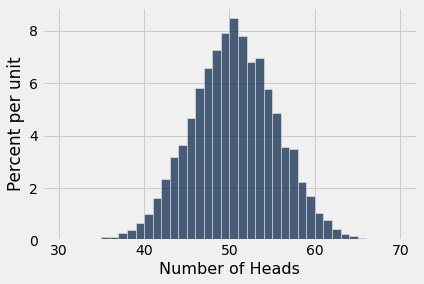

In [38]:
#: visualize distribution of trial results
Table().with_columns(
    'Number of Heads', head_counts
).hist(bins=np.arange(30, 71))

# Simulating Monty Hall

## Simulation strategy

1. Figure out how to simulate one game of Monty Hall.
2. Play a bunch of games.
3. Count the proportion of wins for each strategy (stay or switch).

## Simulating a single game

- We will make a function, `monty_hall()`, which simulates one play.
- Returns a 3-element array describing situation after host reveals first door, before choosing to "stay" or "switch":

```
[
    <prize behind original door>,
    <prize revealed by Monty>,
    <prize behind other door>
]
```

- If the prize behind the original door is the car, staying wins.
- If the prize behind the other door is the car, switching wins.

## Randomly pick an original door

- Randomly assign a prize to the original choice of door.
- You don't know what it is, yet, but Monty does.

In [56]:
#: randomly assign original_door_prize to a prize
prizes = ['Goat 1', 'Goat 2', 'Car']
original_door_prize = np.random.choice(prizes)
original_door_prize

'Goat 2'

## What does Monty reveal?

- If your original door contains the car, Monty reveals a goat at random.
- If your original door contains a goat, Monty reveals the other goat.

In [61]:
def other_one(arr, which_is_not):
    if which_is_not == arr.item(0):
        return arr.item(1)
    elif which_is_not == arr.item(1):
        return arr.item(0)
    else:
        print('Invalid input!')

goats = make_array('Goat 1', 'Goat 2')
other_one(goats, which_is_not='Goat 1')

'Goat 2'

## What does Monty reveal?

- If your original door contains the car, Monty reveals a goat at random.
- If your original door contains a goat, Monty reveals the other goat.

In [ ]:
goats = make_array('Goat 1', 'Goat 2')

if original_door_prize == 'Car':
    revealed = np.random.choice(['Goat 1', 'Goat 2'])
    other_door_prize = other_one(goats, which_is_not=revealed)
else: # it is a goat
    revealed = other_one(goats, which_is_not=original_door_prize)
    other_door_prize = 'Car'

## Putting it together...

In [62]:
def monty_hall():
    # randomly assign original_door_prize to a prize
    prizes = ['Goat 1', 'Goat 2', 'Car']
    original_door_prize = np.random.choice(prizes)
    
    goats = make_array('Goat 1', 'Goat 2')

    if original_door_prize == 'Car':
        revealed = np.random.choice(['Goat 1', 'Goat 2'])
        other_door_prize = other_one(goats, which_is_not=revealed)
    else: # it is a goat
        revealed = other_one(goats, which_is_not=original_door_prize)
        other_door_prize = 'Car'

    return make_array(original_door_prize, revealed, other_door_prize)

In [78]:
monty_hall()

array(['Car', 'Goat 2', 'Goat 1'], dtype='<U6')

## Play a bunch of times

In [79]:
#: many simulations
n_repetitions = 1000

behind_original = make_array()
behind_revealed = make_array()
behind_other = make_array()

for i in np.arange(n_repetitions):
    result = monty_hall()
    behind_original = np.append(behind_original, result.item(0))
    behind_revealed = np.append(behind_revealed, result.item(1))
    behind_other = np.append(behind_other, result.item(2))

## Counting successes...

In [80]:
#: make a table of results
simulations = Table().with_columns(
    'original', behind_original,
    'revealed', behind_revealed,
    'other', behind_other
)
simulations

original,revealed,other
Car,Goat 2,Goat 1
Car,Goat 2,Goat 1
Goat 1,Goat 2,Car
Goat 1,Goat 2,Car
Goat 1,Goat 2,Car
Car,Goat 2,Goat 1
Car,Goat 2,Goat 1
Car,Goat 2,Goat 1
Goat 1,Goat 2,Car
Car,Goat 2,Goat 1


In [81]:
simulations.group('original')

original,count
Car,346
Goat 1,327
Goat 2,327


In [82]:
simulations.group('other')

other,count
Car,654
Goat 1,175
Goat 2,171


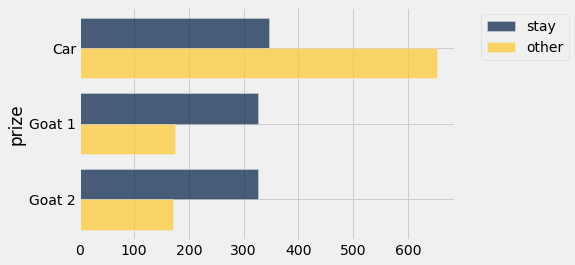

In [83]:
results = Table().with_columns(
    'prize', make_array('Car', 'Goat 1', 'Goat 2'),
    'stay', simulations.group('original').column('count'),
    'other', simulations.group('other').column('count')
)
results.barh('prize')

## A simpler simulation...

- A function `simpler_monty_hall()`.
- Returns "switch" if switching was the winning strategy.
- Returns "stay" if staying was the winning strategy.

## Case-by-case

In [ ]:
#: a simpler simulation of a single game

def simpler_monty_hall():
    original_prize = np.random.choice(['Car', 'Goat 1', 'Goat 2'])
    
    if original_prize == 'Car':
        # We want to stay!
        return 'stay'
    else:
        # The original prize is a goat.
        # Monty will reveal the other goat.
        # Switching wins!
        return 'switch'

## Play a bunch of times

In [ ]:
#: many simulations

n_repetitions = 100

winning_strategies = make_array()
for i in np.arange(n_repetitions):
    winning_strategy = simpler_monty_hall()
    winning_strategies = np.append(winning_strategies, winning_strategy)
    
np.count_nonzero(winning_strategies == 'switch') / n_repetitions

# Probability

## Probability Theory

- So far, we have approximated some probabilities via simulation.
- But we can calculate them directly using *math*.

## Terminology

- **Outcome**: The result of an experiment.
    - e.g., the possible outcomes of rolling a 6-sided die are 1, 2, 3, 4, 5, 6
    - e.g., the possible outcomes of flipping a coin twice are HH, HT, TH, TT
- **Event**: A set of outcomes.
    - e.g., the event that the die lands on a even number is the collection of outcomes {2, 4, 6}.
    - e.g., the event that there was at least one head in two flips: {HH, HT, TH}
- **Probability**: A number between 0 and 1 which describes likelihood of event.
    - 1 if that event always happens
    - 0 if that event never happens
    - Notation: if $X$ is an event, $P(X)$ is the probability of the event.

## Equally-likely outcomes

- If all outcomes are equally likely, computing probabilities is done by counting:

$$
P(A) = \frac{
    \text{# of outcomes that make $A$ happen}
}{
    \text{total # of outcomes}
}
$$

## Probability - long term frequency
What does it mean $P(head) = \frac{1}{2}$

In [87]:
#Run a simulation
num_heads=0
freq=make_array()
for i in np.arange(1,10001):
    result=np.random.choice(['Heads','Tails'])
    num_heads+=np.count_nonzero(result=='Heads')
    freq=np.append(freq,num_heads/i)

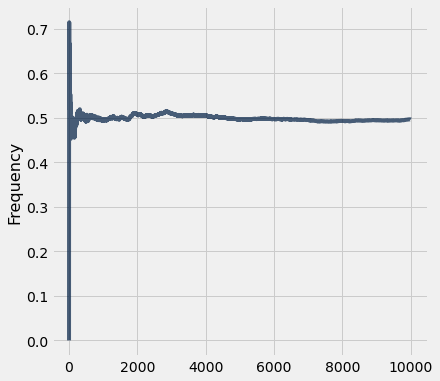

In [90]:
Table().with_column('Frequency',freq).plot()

## Discussion question

I have three cards: red, blue, and green. What is the chance that I choose a card at random, and it is green, then -- without putting it back -- I choose another card at random and it is red?

- A) 1/9
- B) 1/6
- C) 1/3
- D) 2/3
- E) None of the above.

## Discussion question solved

- The possible outcomes are: RG, RB, GR, GB, BR, BG.
- The outcomes are equally-likely.
- There is only one outcome which makes the event happen: GR.
- Hence the probability is $1/6$.

## Conditional probabilities

- Two events $A$ and $B$ can both happen.
    - e.g.: $A$ is event "roll is 3 or less", $B$ is event "roll is even"
- Suppose that we know $A$ has happened, but we don't know if $B$ has.
- If $A$ has happened, we toss out outcomes where $A$ doesn't happen.
- The conditional probability of $B$ given $A$ is:

$$
P(B \text{ given } A)
= \frac{
    \text{# of outcomes satisfying both $A$ and $B$}
}{
    \text{# of outcomes satisfying $A$}
}
$$

## Discussion question

I roll a six-sided die and don't tell you what the result is, but I tell you that it is less than or equal to three. What is the probability that the result is even?

- A) 1/2
- B) 1/3
- C) 1/4
- D) None of the above.

## Discussion problem solved

- There are three outcomes where the roll is three or less: 1, 2, 3
- There are is only one outcome where both $A$ and $B$ happen: 2
- So $P(B \text{ given } A) = 1/ 3$

## Probability that two events both happen

$$
P(A \text{ and } B) = \frac{
    \text{# of outcomes satisfying $A$ and $B$ both}
}{
    \text{total # of outcomes}
}
$$

What is the probability that the roll is even and less than three?

- Only one outcome: 2.
- Six total outcomes.
- Probability is $1/6$.

## Another way to compute that...

We have two formulas with the same numerator:

$$
P(B \text{ given } A)
= \frac{
    \text{# of outcomes satisfying both $A$ and $B$}
}{
    \text{# of outcomes satisfying $A$}
}
$$

$$
P(A \text{ and } B) = \frac{
    \text{# of outcomes satisfying both $A$ and $B$}
}{
    \text{total # of outcomes}
}
$$

So:
$$
    P(B \text{ given } A) \cdot \text{# of outcomes satisfying $A$}
    =
    P(A \text{ and } B) \cdot \text{total # of outcomes}
$$

such that:
$$
    \begin{align*}
    P(A \text{ and } B) &= \frac{
        P(B \text{ given } A) \cdot \text{# of outcomes satisfying $A$}
    }{
        \text{total # of outcomes}
    }\\[1em]
    &=
    P(A \text{ given } B) \cdot P(A)
    \end{align*}
$$

## Probability that two events both happen

$$
    P(A \text{ and } B)
    =
    P(A \text{ given } B) \cdot P(A)
$$

- Suppose $A$ happens half the time.
- And $B$ happens half of the time that $A$ happens.
- Then $A$ and $B$ happen together $1/2 \cdot 1/2 = 1/4$ of the time.

## Discussion question

I have three cards: red, blue, and green. I pick one card, then, without putting it back, I pick a second card. What is the probability that I pick one red and one green?

- A) 1/6
- B) 1/3
- C) 5/6
- D) None of the above.

## Discussion question solved

- Remember that there are six outcomes: RG, RB, BG, BR, GR, GB.
- Two of them contain both R and G.
- Hence: $2/6 = 1/3$.

## What if $B$ isn't affected by $A$?

- We have found that $P(A \text{ and } B) = P(A \text{ given } B)\cdot P(B)$.
- Sometimes $P(A \text{ given } B) = P(A)$. Then $P(A \text{ and } B) = P(A) \cdot P(B)$
- Example: Suppose we flip a fair coin three times.
    - The probability that the second flip is heads doesn't depend on the result of the first flip.
- What is the probability of getting tails three times in a row?
    - $1/2 \cdot 1/2 \cdot 1/2 = 1/8$

## Probability of either of two events happening

$$
P(A \text{ or } B) = \frac{
    \text{# of outcomes satisfying either $A$ or $B$}
    }{
    \text{total # of outcomes}
    }
$$

## Mutual exclusivity

- Suppose that if $A$ happens, then $B$ doesn't, and if $B$ happens then $A$ doesn't.
- Then the # of outcomes satisfying either A or B is just:
$$
    (\text{# of outcomes satisfying $A$})
    +
    (\text{# of outcomes satisfying $B$})
$$
- So **if** $A$ and $B$ are mutually exclusive:

$$
\begin{align*}
    P(A \text{ or } B) 
    &= \frac{
        \text{# of outcomes satisfying either $A$ or $B$}
        }{
        \text{total # of outcomes}
        }
        \\[1em]
    &= \frac{
            (\text{# of outcomes satisfying $A$})
            +
            (\text{# of outcomes satisfying $B$})
        }{
        \text{total # of outcomes}
        }
        \\[1em]
    &= \frac{
            (\text{# of outcomes satisfying $A$})
        }{
        \text{total # of outcomes}
        }
        +
        \frac{
            (\text{# of outcomes satisfying $B$})
        }{
        \text{total # of outcomes}
        }
    \\[1em]
    &= P(A) + P(B)
\end{align*}
$$

## Probability that an event *doesn't* happen

- The probability that $A$ doesn't happen is just $1 - P(A)$.
- Example:
    - If the probability of a sunny day is 0.85, then the probability of a non-sunny day is 0.15.

## Discussion question

What is the probability of at least one head in 3 tosses?

- A) 1/2
- B) 3/4
- C) 7/8
- D) None of the above.

## Discussion question solved

- We use a trick: calculate the probability of getting no heads in 3 tossed.
- Our answer is 1, minus that.
- Probability of no heads: $P(TTT) = 1/2 \cdot 1/2 \cdot 1/2 = 1/8$.
- Probability of at least one heads: $1 - 1/8 = 7/8$

## Discussion question

Every time I call my grandma, the probability that she answers her phone is 1/3. If I call my grandma three times today, what is the chance that I will talk to her?

- A) 1/3
- B) 2/3
- C) 1/2
- D) 1
- E) None of the above.

In [98]:
result = 0
for i in np.arange(10000):
    one=np.count_nonzero(np.random.choice(['answer','ignore','ignore'],3)=='answer')
    if one >=1:
        result+=1

print(result/10000)

0.7023


## Discussion question solved

- We calculate the probability that she doesn't answer her phone in three tries.
- $2/3 \cdot 2/3 \cdot 2/3 = 8/27$.
- But we want the probability of her answering *at least* once. So we subtract this from one.
- $1 - 8/27 = 19/27$; none of the above!

### Deterministic sample:
* Sampling scheme doesn’t involve chance

### Probability (random) sample:
* Before the sample is drawn, you have to know the probability of selecting each group of people in the population
* Not all individuals need to have an equal chance of being selected

### Example: deterministic sample

Sample of students: take 50% of students, alphabetically by last name

### Example: probability sample

Sample of students: flip a coin for each student in class (heads, keep; tails, leave)

### Example: a probability sample
* Population: 3 individuals (A, B, C)
* Select a sample of 2
    - A chosen with probability 1
    - Choose B or C based on coin toss
* Possible samples: AB, AC, BC
    - Chance of AB: ½
    - Chance of AC: ½
    - Chance of BC = 0

In [99]:
#:
top = Table.read_table('top_movies.csv')
top = top.with_column('Row Index', np.arange(top.num_rows))
top = top.move_to_start('Row Index')

top

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


### Example: deterministic or probabilistic sample?
* a sample of 3 specific rows

In [100]:
top.take(make_array(3,5,8))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015


### Example: deterministic or probabilistic sample?
* a sample via a where statement

In [ ]:
top.where('Title', are.containing('and the'))

### Discussion question
Is the following sampling scheme a deterministic or probabilistic sample?
* Start with a random number; take every tenth row thereafter.

|Option|Answer|
|---|---|
|A| Deterministic|
|B| Probabilitstic|

###  Answer
* Start with a random number; take every tenth row thereafter.
* Any given row is equally likely to be picked! (But not true for groups of rows!)

In [101]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
2,Titanic,Paramount,658672302,1178627900,1997
12,The Hunger Games: Catching Fire,Lionsgate,424668047,444697400,2013
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
32,American Sniper,Warner Bros.,350126372,374796000,2014
42,Iron Man,Paramount,318412101,385808100,2008
52,Skyfall,Sony,304360277,329225400,2012
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
72,Jaws,Universal,260000000,1114285700,1975
82,Twister,Warner Bros.,241721524,475786700,1996
92,Ghost,Paramount,217631306,447747400,1990


### Example: samples uniformly at random with(out) replacement
* `Table.sample` method
* `with_replacement=True` is default.

In [102]:
# with replacement
top.sample(5)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
193,House of Wax,Warner Bros.,23750000,439627700,1953
174,The Ten Commandments,Paramount,65500000,1139700000,1956
52,Skyfall,Sony,304360277,329225400,2012
147,Doctor Zhivago,MGM,111721910,1079978500,1965
197,Duel in the Sun,Selz.,20408163,443877500,1946


In [109]:
# without replacement
top.sample(5, with_replacement=False)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
99,Armageddon,Buena Vista (Disney),201578182,373929700,1998
82,Twister,Warner Bros.,241721524,475786700,1996
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
64,Home Alone,Fox,285761243,589287500,1990


## Sample of Convenience
* Example: sample consists of whoever walks by
    - Just because you think you’re sampling “at random”, doesn’t mean you are.
* If you can’t figure out ahead of time 
    * what’s the population
    * what’s the chance of selection, for each group in the population  
 
 then you don’t have a random sample!

### Examples: sample of convenience

* Voluntary internet surveys
* Interviewing people on Library Walk
* The first 100 visits to a website after an email campaign begins.

### Samples of convenience: pros and cons
* Pros: 
    - Easy and inexpensive
    - Most common type of sample
* Cons: 
    - Results won't generalize to the population as a whole
    - Results are likely biased

### Example: sample of convenience

* Study: determine the average age and sex of gamblers at a casino 
* Methodology: conducted for three hours on a weekday afternoon 
* Bias: Might overrepresent elderly people who have retired and underrepresented by people of working age